# Discussion 5: Quadratic Functions, Newton's Method

In this discussion, we will talk about:
* Rate of convergence for steepest descent on quadratic functions
* Newton's method

---

## Rate of Convergence

* Rate of convergence $p\ge1$ is defined as the value such that

$$ 0< \lim_{k\to\infty} \frac{\|\mathbf{x}_{k+1}-\mathbf{x}^*\|}{\|\mathbf{x}_k-\mathbf{x}^*\|^p} \equiv L < \infty $$

where $\mathbf{x}^*$ is the known minimizer, i.e. the terminal point satisfying $\nabla f(\mathbf{x}^*)=\mathbf{0}$. If $p=1$ and $L=1$, we say the convergence is **sub-linear**. If $p=1$ and $L<1$, we say the convergence is **linear**. If $p>1$, we say the convergence is **super-linear**. If the limit is equal to 0 for all $p\ge1$, we say the order of convergence is $\infty$.

* If we're given the steps $\{x_k\}$ of an iteration, we can determine $p$ empirically by

$$ p\approx \frac{\ln\left(\frac{\|\mathbf{x}_{k+1}-\mathbf{x}_k\|}{\|\mathbf{x}_k-\mathbf{x}_{k-1}\|}\right)}{\ln\left(\frac{\|\mathbf{x}_{k}-\mathbf{x}_{k-1}\|}{\|\mathbf{x}_{k-1}-\mathbf{x}_{k-2}\|}\right)} $$
as $k\to\infty$.

### Quadratic Functions

We've shown some nice analytic results for a special class of functions called **quadratic functions**, i.e. those of the form

$$ f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^TQ\mathbf{x}-\mathbf{b}^T\mathbf{x} $$

for $\mathbf{b}\in\mathbb{R}^d$, $Q$ a symmetric positive definite $d\times d$ matrix. Most of the example functions we have used to this point have been functions of this type.

### Example: Quadratic function

Note that if $\mathbf{x}\in\mathbb{R}^2$, we have
$$ \begin{align*}
    \frac{1}{2}\mathbf{x}^TQ\mathbf{x}-\mathbf{b}^T\mathbf{x} &= \frac{1}{2}\begin{pmatrix} x_1 & x_2 \end{pmatrix}
    \begin{pmatrix}
        Q_{1,1} & Q_{1,2} \\
        Q_{1,2} & Q_{2,2}
    \end{pmatrix}\begin{pmatrix} x_1 \\ x_2\end{pmatrix} - \begin{pmatrix} b_1 & b_2\end{pmatrix}\begin{pmatrix} x_1 \\x_2 \end{pmatrix} \\
    & = \frac{1}{2}Q_{1,1}x_1^2 + \frac{1}{2}Q_{2,2}x_2^2 + Q_{1,2}x_1x_2 - b_1x_1 - b_2x_2
\end{align*}$$
so, using the example function

$$ g(x,y) = (x-1)^2+(2y-1)^2 = x^2+4y^2 - 2x - 4y + 2 $$

we can identify
$$ Q=\begin{pmatrix} 2 & 0 \\ 0 & 8 \end{pmatrix},\quad \mathbf{b}=\begin{pmatrix} 2 \\ 4 \end{pmatrix} $$

with the minimization of the function $f(x,y)\equiv g(x,y)-2$. Note that the subtraction of a constant will not affect the location of the minimizer, $\mathbf{x}^*=(1,1/2)$. 

### Steepest Descent on Quadratic Functions

Thanks to the nice form of quadratic functions, there are some reasonably straightforward theoretical convergence results that can be shown. Since we have the simple expression $\nabla f(\mathbf{x}) = Q\mathbf{x}-\mathbf{b}$, one step of steepest descent is given by

$$ \mathbf{x}_{k+1} = \mathbf{x}_k - \alpha_k\nabla f_k = \mathbf{x}_k - \alpha_k(Q\mathbf{x}_k-\mathbf{b}) $$

Then the optimal value of $\alpha_k$ is easily determined by taking a derivative of $\phi(\alpha)=f(\mathbf{x}_k -\alpha\nabla f_k)$ and setting it equal to zero, giving

$$ \begin{align*}
    0 &= -\nabla f_k^T\big(Q(\mathbf{x}_k-\alpha\nabla f_k)-\mathbf{b}\big) \\
    &= -\nabla f_k^T(Q\mathbf{x}_k-\mathbf{b}) + \alpha\nabla f_k^TQ\nabla f_k \\
    &= -\nabla f_k^T\nabla f_k + \alpha\nabla f_k^TQ\nabla f_k \\
    \implies &\alpha_k = \frac{\|\nabla f_k\|^2}{\|\nabla f_k\|_Q^2} = \frac{(Q\mathbf{x}_k-\mathbf{b})^T(Q\mathbf{x}_k-\mathbf{b})}{(Q\mathbf{x}_k-\mathbf{b})^TQ(Q\mathbf{x}_k-\mathbf{b})}
\end{align*}$$

where $\|\mathbf{u}\|_Q^2 = \mathbf{u}^TQ\mathbf{u}$. 

Now, concerning rate of convergence, we need to find the ratio between the error in successive iterations,

$$ \frac{\|\mathbf{x}_{k+1}-\mathbf{x}^*\|}{\|\mathbf{x}_{k}-\mathbf{x}^*\|} $$

Noting that $Q\mathbf{x}^*=\mathbf{b}$ by design (i.e. $\nabla f(\mathbf{x}^*)=\mathbf{0}$), we can rewrite one iteration of steepest descent as

$$ \begin{align*}
    \mathbf{x}_{k+1} &= \mathbf{x}_k - \alpha_k(Q\mathbf{x}_k-Q\mathbf{x}^*) \\
    \implies \mathbf{x}_{k+1}-\mathbf{x}^* &= \mathbf{x}_k -\mathbf{x}^*- \alpha_kQ(\mathbf{x}_k-\mathbf{x}^*) \\
            &= (I-\alpha_kQ)(\mathbf{x}_k-\mathbf{x}^*) \\
    \implies \|\mathbf{x}_{k+1}-\mathbf{x}^*\|^2 &= (\mathbf{x}_{k+1}-\mathbf{x}^*)^T(I-\alpha_kQ)(\mathbf{x}_k-\mathbf{x}^*) \\
            &=(\mathbf{x}_k-\mathbf{x}^*)^T(I-\alpha_kQ)^2(\mathbf{x}_k-\mathbf{x}^*) \\
    \implies \frac{\|\mathbf{x}_{k+1}-\mathbf{x}^*\|^2}{\|\mathbf{x}_{k}-\mathbf{x}^*\|^2} &\le \lambda_{max}\big((I-\alpha_kQ)^2\big)
\end{align*}$$

where the last inequality uses the fact that $\|\mathbf{u}\|_Q\le\lambda_{max}(Q)\|\mathbf{u}\|$. 

### The main points from the lecture on Quadratic Functions:

* **Optimal step size** is found as 

$$ \alpha_k = \frac{2}{\lambda_{max}(Q) + \lambda_{min}(Q)} $$

which is independent of $\mathbf{x}_k$ and thus is a good choice for fixed step size steepest descent for quadratic functions. 

* **Bound on order of convergence:**
If we substitute this value of $\alpha$ in, we get the inequality
$$ \frac{\|\mathbf{x}_{k+1}-\mathbf{x}^*\|^2}{\|\mathbf{x}_{k}-\mathbf{x}^*\|^2} \le \left(\frac{\lambda_{max}-\lambda_{min}}{\lambda_{max}+\lambda_{min}}\right)^2 \equiv \left(\frac{\kappa-1}{\kappa+1}\right)^2 $$

where $\kappa\equiv \lambda_{max}/\lambda_{min}$ is called the **condition number** of $Q$. Note that (the square root of) this inequality tells us steepest descent with this choice of $\alpha$ convergens **linearly at worst** ($p=1$, $L<1$).

* **Special Case**: IF $\lambda_{\max} = \lambda_{\min}$, then $\kappa = 1$, so the iteration converges in a single step.

Indeed though this seems like a very special type of function, the above result can be extended to any function $f$, not necessarily quadratic, so long as $H\equiv \nabla^2 f(\mathbf{x}^*)$ is symmetric positive definite at the minimizer, with the substitution $\kappa\to\kappa_H$, where $\kappa_H$ is the condition number of $H$.

### Example: Fixed step steepest descent

Perform fixed step steepest descent on the function $f(x,y)=x^2 + 2y^2 + 4x + y + 6$ starting from an initial guess of $\mathbf{x}_0=(3,-2)$ and choosing $\alpha_k$ to be the constant defined above.

**Solution:** First, note that this is a quadratic function with
$$ Q=\begin{pmatrix}
    2 & 0 \\
    0 & 4
\end{pmatrix},\quad \mathbf{b}=\begin{pmatrix} -4 \\ -1\end{pmatrix} $$

Then $\lambda_{max}(Q)=4$, $\lambda_{min}(Q)=2$, and thus $\alpha_k=2/(4+2)=1/3$ should provide adequately fast convergence.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# function and gradient
f = lambda x: x[0]**2 + 2*x[1]**2 + 4*x[0] + x[1] + 6
Df = lambda x: np.array([2*x[0]+4, 4*x[1]+1])

x = np.array([3,-2])  # initial point
path = [x]
print(f'Initial x={x}')
alpha = 1/3           # step size
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 1000      # Maximum number of steps to run the iteration
i=0                   # iteration count
dx = Df(x)            # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    xnew = x - alpha*dx
    path.append(xnew)
    x = xnew
    dx = Df(x)
    i += 1

path=np.array(path)
print(f'After {i} iterations, approximate minimum is {f(x)} at {x}')

Initial x=[ 3 -2]
After 21 iterations, approximate minimum is 1.875 at [-2.   -0.25]


**Exercise:** Investigate what happens for values of $\alpha$ slightly larger or slightly smaller than the "optimal" fixed value of $1/3$. You should see that convergence takes more iterations in each case.

Text(0.5, 1.0, 'Number of iterations for convergence based on various alpha')

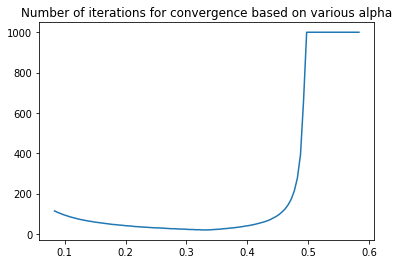

In [14]:
eps = np.linspace(-1/4,1/4,100)
iterations = []
for e in eps:
    x = np.array([3,-2])  # initial point
    alpha = 1/3 + e       # step size
    tol = 1e-8            # stop when gradient is smaller than this amount
    max_steps = 1000      # Maximum number of steps to run the iteration
    i=0                   # iteration count
    dx = Df(x)            # current gradient
    while np.linalg.norm(dx)>tol and i<max_steps:
        xnew = x - alpha*dx
        x = xnew
        dx = Df(x)
        i += 1
    iterations.append((1/3 + e, i))
plt.plot(*zip(*iterations))
plt.title('Number of iterations for convergence based on various alpha')

In [15]:
err = np.linalg.norm(path-np.array([-2,-1/4]),axis=1) # ||x_k - x*||
print(err[-1]/err[-2])   # limiting convergence bound, should be ≤ 1/3 = (K-1)/(K+1)

0.3729286924429989


---

## Newton's Method

* Steepest descent gradient descent gives linear convergence. **Newton's method** has quadratic ($p=2$) convergence, which is better than Steepest Descent.


In the 1-D case, [Newton's method](https://en.wikipedia.org/wiki/Newton's_method) is an often taught method for finding the zeros of a single-variable, nonlinear function, i.e. an $x^*$ such that $f(x^*)=0$. The iteration is given by
$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} $$

and can be interpreted geometrically as constructing a tangent line to $f$ at $x_k$, finding where the tangent line crosses the $x$-axis, and repeating, as shown in the image below:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Newton_method_scheme.svg/992px-Newton_method_scheme.svg.png" width=30% />

In **optimization**, we're usually searching for a point where $f'(x)=0$, not $f(x)=0$, so simply replacing $f\to f'$ yields an algorithm for finding a minimum, albeit requiring information about the second derivative $f''(x)$. We have for [Newton's method in optimization](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization),

$$ x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)} $$
or the straightforward generalization to multiple dimensions
$$ \mathbf{x}_{k+1} = \mathbf{x}_k - \left[\nabla^2 f_k\right]^{-1}\nabla f_k $$

It should be easy to see that this does indeed correspond to a line search algorithm with $\mathbf{p}_k = -\left[\nabla^2 f_k\right]^{-1}$, called the **Newton direction**, and $\alpha_k=1$.

## Implementation

When you're dealing with a matrix $H$, you don't actually invert the matrix. Instead, there are methods to solve $Hx = b$ for $x$.

So rather than finding $-[\nabla^2 f_k]^{-1} \nabla f_k$, we solve $\nabla^2 f_k p_k = \nabla f_k$ then do $x_{k+1} = x_k - p_k$.

Let's now apply Newton's method to the example function $f(x,y)=x^2+2y^2+4x+y+6$ defined above:

In [17]:
# function, gradient, and now HESSIAN
f = lambda x: x[0]**2 + 2*x[1]**2 + 4*x[0] + x[1] + 6
Df = lambda x: np.array([2*x[0]+4, 4*x[1]+1])
D2f = lambda x: np.array([[2,0],[0,4]])

x = np.array([3,-2])  # initial point
path = [x]
print(f'Initial x={x}')
alpha = 1             # step size is 1 in Newton's method
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 1000      # Maximum number of steps to run the iteration
i=0                   # iteration count
dx = Df(x)            # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = np.linalg.solve(D2f(x),dx)  # faster to solve a system than manually invert
    xnew = x - pk
    path.append(xnew)
    x = xnew
    dx = Df(x)
    i += 1

path=np.array(path)
print(f'After {i} iterations, approximate minimum is {f(x)} at {x}')

Initial x=[ 3 -2]
After 1 iterations, approximate minimum is 1.875 at [-2.   -0.25]


Newton's method converged in a single iteration.

For Quadratic functions, Newton's method will always converge immediately.

For a quadratic function $f(x) = \frac{1}{2}x^T Q x - b^T x$:

* $\nabla f = Qx - b$

* $\nabla^2 f = Q$

Since for any quadratic function $\nabla^2 f = Q$, a single iteration sets

$$ \mathbf{x}_1 = \mathbf{x}_0 - Q^{-1}\nabla f_0 = \mathbf{x}_0 - Q^{-1}(Q\mathbf{x}_0-\mathbf{b}) = \mathbf{x}_0 - \mathbf{x}_0 + Q^{-1}\mathbf{b} = \mathbf{x}^* $$

since $\nabla f = Q\mathbf{x}-\mathbf{b}$ and thus $Q\mathbf{x}^*=\mathbf{b}$. The result is that Newton's method **converges in one iteration** for quadratic functions!

Indeed, by a similar argument to the above for steepest descent, it can be shown that the ratio of errors goes to zero, showing that Newton's method **converges quadratically** at worst for any function with $\nabla^2 f(\mathbf{x}^*)$ SPD.

In [18]:
err = np.linalg.norm(path-np.array([-2,-1/4]),axis=1) # ||x_k - x*||
print(err[-1]/err[-2])   # limiting convergence bound, should be ≤ 1/3 = (K-1)/(K+1)

0.0


## Convergence properties

* If $\nabla^2 f$ is invertible and $\nabla f(x_0) \ne 0$, and the starting point $x_0$ is close enough to $x^*$, then Newton's method converges quadratically.

* For Newton's method to be a descent direction, we need $\nabla^2 f(x_k)$ to be positive definite: This way $-([\nabla^2 f(x_k)]^{-1})^T \nabla f(x_k) < 0$

### Counterexample

Consider $f(x) = \frac{1}{4}x^4 - x^2 + 2x$. The true minimum occurs at $x = -1.769$.

Initial x=0
After 1000 iterations, approximate minimum is 0.0 at 0.0


Text(0.5, 1.0, 'Path of x')

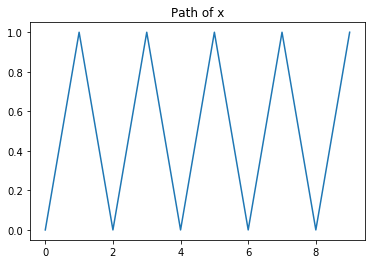

In [52]:
# function, gradient, and now HESSIAN
f = lambda x: 1/4 * x**4 - x**2 + 2*x
Df = lambda x: x**3 - 2*x+2
D2f = lambda x: 3*x**2 - 2

x = 0  # initial point
path = [x]
print(f'Initial x={x}')
alpha = 1             # step size is 1 in Newton's method
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 1000      # Maximum number of steps to run the iteration
i=0                   # iteration count
dx = Df(x)            # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = Df(x) / D2f(x)
    xnew = x - pk
    path.append(xnew)
    x = xnew
    dx = Df(x)
    i += 1

path=np.array(path)
print(f'After {i} iterations, approximate minimum is {f(x)} at {x}')
plt.plot(path[0:10])
plt.title("Path of x")

In this example, Newton's method isn't a descent direction:

In [44]:
print("f(0) is {}".format(f(0)))
print("f(1) is {}".format(f(1)))

f(0) is 0.0
f(1) is 1.25


### Drawbacks of Newton's method

Although Newton's method does converge more quickly than steepest descent, there are a few drawbacks:

1. **Calculation of the gradient and Hessian**: By hand, we need to calculate $\nabla f$ and $\nabla^2 f$.
2. **Inversion of the Hessian**: Even if we can find a way to numerically calculate the Hessian, Newton's method also requires inverting the Hessian (or, more efficiently, solving a linear system) during each iteration, which can be costly, especially for high-dimensional functions.
3. **Only locally convergent**: The Hessian may even be singular far away from the minimizer (though it can be shown the Hessian is nonsingular at least in a neighborhood of $\mathbf{x}^*$), so Newton's method cannot even be defined globally; it is only **locally** convergent.
4. **Lack of guaranteed descent direction**: Even if the Hessian is nonsingular at each point on the iteration, the Newton direction may not be a descent direction in general.

We will talk next time about modifications to Newton's method which attempt to remedy all of the above, called **Quasi-Newton methods**.